<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/Linear_Regression_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Sales in crores
* Branding cost in lakhs

In [ ]:
dat=pd.read_csv('/content/drive/My Drive/Regression Models_Mahesh Anand/Advertising-1.csv',index_col=0)
dat.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
dat.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
dat['TV'].skew()

-0.06985336213274573

In [ ]:
dat['Radio'].skew()

0.09417463149664404

In [ ]:
dat['Newspaper'].skew()

0.8947204074986175

In [ ]:
dat['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

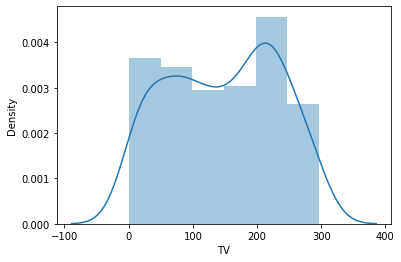

In [ ]:
sns.distplot(dat['TV'])

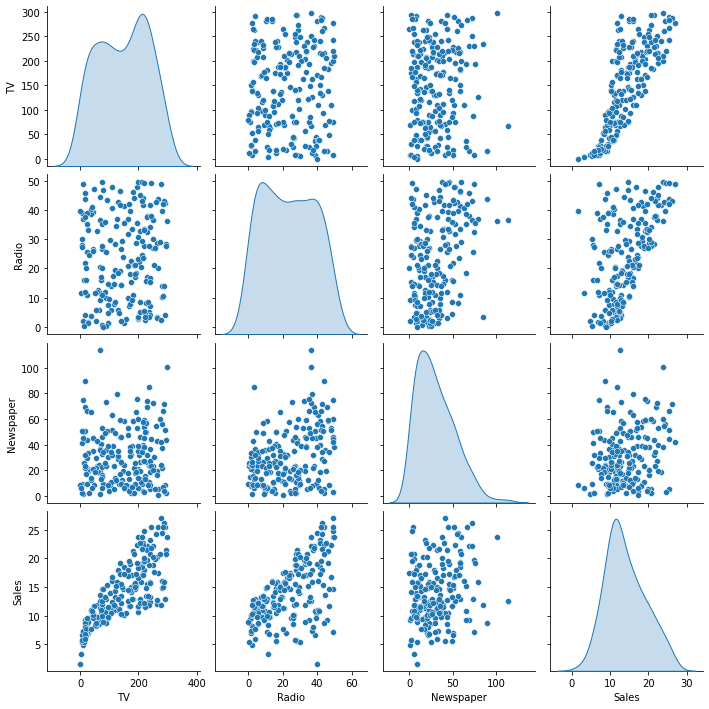

In [ ]:
sns.pairplot(dat,diag_kind='kde')

In [ ]:
dat.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
dat.shape

(200, 4)

In [ ]:
X=dat[['Newspaper','TV','Radio']]
Y=dat['Sales']

In [ ]:
Xc=sm.add_constant(X)
Xc.head()

,const,Newspaper,TV,Radio
1,1.0,69.2,230.1,37.8
2,1.0,45.1,44.5,39.3
3,1.0,69.3,17.2,45.9
4,1.0,58.5,151.5,41.3
5,1.0,58.4,180.8,10.8


In [ ]:
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [ ]:
LR.coef_

array([-0.00103749,  0.04576465,  0.18853002])

In [ ]:
LR.intercept_

2.938889369459421

In [ ]:
model1=sm.OLS(Y,Xc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        11:15:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We eliminate Newspaper because of p-valve>0.05 (ie) probability of null hypothesis being true is high, which implies it's slope being zero is more than 5%

In [ ]:
X_selected=dat[['TV','Radio']]

In [ ]:
Xcc=sm.add_constant(X_selected)

In [ ]:
model2=sm.OLS(Y,Xcc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        11:42:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_selected,Y,test_size=.3,random_state=0)

In [ ]:
xtrain.shape,xtest.shape

((140, 2), (60, 2))

In [ ]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred_test=LR.predict(xtest)
y_pred_train=LR.predict(xtrain)

In [ ]:
from sklearn import metrics

In [ ]:
mse_train=metrics.mean_squared_error(ytrain,y_pred_train)
mse_test=metrics.mean_squared_error(ytest,y_pred_test)


In [ ]:
print('Training Rmse:',np.sqrt(mse_train))
print('Testing Rmse:',np.sqrt(mse_test))


Training Rmse: 1.577258826619012
Testing Rmse: 1.9159357179956473


In [ ]:
LR.intercept_

2.9098956905129256

In [ ]:
LR.coef_

array([0.04396652, 0.20099526])

In [ ]:
LR.intercept_+LR.coef_[0]*100+LR.coef_[1]*150

37.45583648736336

In [ ]:
LR.predict([[100,150]])

array([37.45583649])

In [ ]:
model1.params

const        2.938889
Newspaper   -0.001037
TV           0.045765
Radio        0.188530
dtype: float64

In [ ]:
X=dat[['TV','Radio']]
Y=dat['Sales']

In [ ]:
Xc=sm.add_constant(X)

In [ ]:
model2=sm.OLS(Y,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        09:00:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics

In [ ]:
LR=LinearRegression()

In [ ]:
dat['TV'].skew()

-0.06985336213274573

In [ ]:
dat['Radio'].skew()

0.09417463149664404

In [ ]:
dat['Newspaper'].skew()

0.8947204074986175

In [ ]:
X=dat[['TV','Radio']]
Y=dat['Sales']

In [ ]:
Xc=sm.add_constant(X)

In [ ]:
model2=sm.OLS(Y,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        07:18:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m2=LinearRegression()

In [ ]:
m1=LinearRegression()
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(m2,X,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error',np.mean(np.abs(scores)))
print('Var_error',np.std(np.abs(scores),ddof=1))


Bias_error 1.7183718074652006
Var_error 0.1690201972789645


In [ ]:
X_new=dat[['TV']]
Y=dat['Sales']

In [ ]:
Xc2=sm.add_constant(X_new)

In [ ]:
model3=sm.OLS(Y,Xc2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        14:38:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=dat[['TV','Radio']]

In [ ]:
Y=dat['Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape

((140, 2), (60, 2))

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(xtrain,ytrain)
y_pred_test=LR.predict(xtest)
y_pred_train=LR.predict(xtrain)

In [ ]:
from sklearn import metrics
mse=metrics.mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse)
print(rmse_test)

1.9159357179956473


In [ ]:
mse=metrics.mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse)
print(rmse_train)

1.577258826619012


In [ ]:
#3-fold Cross Validation

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
rmse=cross_val_score(LR,X,Y,cv=kf,scoring='neg_root_mean_squared_error')
LR_be=np.mean(np.abs(rmse))
LR_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',LR_be)
print('VAR_Error',LR_ve)

Bias_Error 1.7240421067305942
VAR_Error 0.1734074873048549


In [ ]:
Xc=sm.add_constant(X)
model2=sm.OLS(Y,Xc).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           4.83e-98
Time:                        06:52:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=dat[['TV','Radio','Newspaper']]
Xc=sm.add_constant(X)
model3=sm.OLS(Y,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        06:51:24   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8894      0.361      7.995      0.000       2.177       3.602
TV             0.0457      0.001     32.810      0.000       0.043       0.048
Radio          0.1876      0.008     22.190      0.000       0.171       0.204
Newspaper      0.0060      0.040      0.152      0.879      -0.072       0.084
==============================================================================
Omnibus:                       59.670   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.495
Skew:                          -1.320   Prob(JB):                     1.55e-32
Kurtosis:                       6.258   Cond. No.                         521.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=dat[['TV','Radio']]
Xc=sm.add_constant(X)
model4=sm.OLS(Y,Xc).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        06:58:17   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
xtrain.shape,xtest.shape

((140, 2), (60, 2))

In [ ]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
print(LR.coef_)
print(LR.intercept_)

[0.00184368 0.04391531 0.20027962]
2.8802552863313355


In [ ]:
y_pred_train=LR.predict(xtrain)
y_pred_test=LR.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
rmse_train=np.sqrt(metrics.mean_squared_error(ytrain,y_pred_train))
print(rmse_train)

1.577258826619012


In [ ]:
rmse_test=np.sqrt(metrics.mean_squared_error(ytest,y_pred_test))
print(rmse_test)

1.9159357179956473


In [ ]:
#K-fold cross validation
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,X,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias_error:',np.mean(np.abs(scores)))
print('Var_error:',np.std(np.abs(scores),ddof=1))

Bias_error: 1.7240421067305942
Var_error: 0.1734074873048549


In [ ]:
np.abs(scores)

array([1.84023874, 1.52472087, 1.80716672])

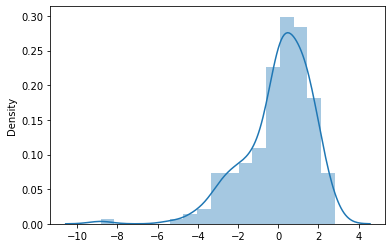

In [ ]:
#Verifying model1 satisfies linearity assumptions
res=model.resid
# plot a distribution plot using distplot()
sns.distplot(res)

# display the plot
plt.show()

In [ ]:
res.skew()

-1.3374051634783624

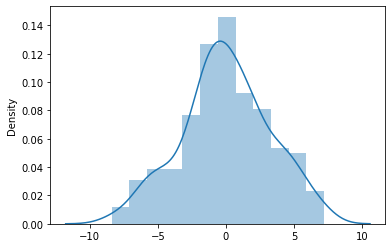

In [ ]:
#Verifying model2 satisfies linearity assumptions
res3=model3.resid
# plot a distribution plot using distplot()
sns.distplot(res3)

# display the plot
plt.show()

In [ ]:
res3.skew()

-0.08930319821835693

In [ ]:
#check the model residuals are linear (Homoskedasticity)
#If the residuals are normally distributed,then we can conclude there is no heteroskedasticity

In [ ]:
from scipy.stats import shapiro
shapiro(res3)

ShapiroResult(statistic=0.9905306696891785, pvalue=0.21332456171512604)

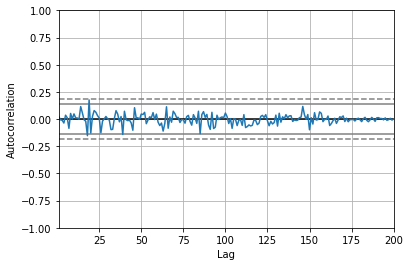

In [ ]:
#Autocorrelation effect in residuals
pd.plotting.autocorrelation_plot(res3)

we can notice negligible (around 0.1) autocorrelation effect in the residuals

In [ ]:
#To check the level of multicollinearity in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = dat[['TV','Radio','Newspaper']]

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
print(vif)

   VIF_Factor   Features
0    2.486772         TV
1    3.285462      Radio
2    3.055245  Newspaper
